In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import norm
from scipy.stats import chi2
from scipy import constants

In [2]:
#Graphing variables
pagewidth = (8.5, 5)

In [10]:
#Function definitions

''' Plots the distributions of data as a histogram against the gaussian distribution with mean and stddev matching
    that of the data. 
'''
def plot_distribution(data, filename, title, figsize=pagewidth, bins=70, hrange=(-100, 100), 
                      directory='graphs/distributions/'):
    plt.figure(figsize=figsize)
    gspace = np.linspace(hrange[0], hrange[1], 1000)
    gnorm = norm.pdf(gspace, loc=np.mean(data), scale=np.std(data))
    gnorm *= 1000 * len(data) / (sum(gnorm) * bins)
    plt.plot(gspace, gnorm, color='orange', label='normal distribution')
    plt.hist(data, bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Data, with frequency '+title)
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

''' Sums n adjacent samples together in list data and returns a new list of size len(data)/n. 
    n should be a factor of len(data).
'''
def sum_adjacent(data, n):
    new_set = np.array([])
    for i in range(len(data)):
        np.append(new_set, sum(data[n*i:n*i+n]))

''' Plots the distributions of power data as a histogram against the chi squared distribution 
    with mean and stddev matching that of the data. 
'''
def plot_chi2(data, n, filename, title, figsize=pagewidth, bins=70, hrange=(-100, 100), 
              directory='graphs/chi2/'):
    plt.figure(figsize=figsize)
    cspace = np.linspace(hrange[0], hrange[1], 1000)
    cnorm = chi2.pdf(cspace, n, loc=np.mean(data), scale=np.std(data))
    cnorm *= 1000 * len(data) / (sum(cnorm) * bins * n)
    plt.plot(cspace, cnorm, color='orange', label='chi2 distribution, df='+str(n))
    plt.hist(sum_adjacent(data, n), bins=bins, range=hrange, facecolor='blue', alpha=0.5, label='data distribution')
    plt.xlabel('ADC Reading (bits)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Power Estimates, with frequency '+title)
    plt.legend()
    plt.savefig(directory+filename+'.png', bbox_inches='tight')

In [4]:
#Data input and formatting
directory = 'newdata/'
filenames = ['room_UHF_100m', 'room_FM_100m', 'room_LTE_100m', 
             'boiling', #'boiling2', 'boiling3', 'boiling4',
             'ice', 'dry_ice', 'liquid_nitrogen']
titles = ['1GHz @21.9$^\circ$ C', '100MHz @21.9$^\circ$ C', '720MHz @21.9$^\circ$ C', 
          '1GHz @87.2$^\circ$ C', #'1GHz @77.1$^\circ$ C', '1GHz @61.8$^\circ$ C', '1GHz @56.6$^\circ$ C', 
          '1GHz @0.8$^\circ$ C', '1GHz @-78.5$^\circ$ C', '1GHz @-195.8$^\circ$ C']

data = np.empty((len(filenames), 100000000))
for i in range(len(filenames)): data[i] = np.fromfile(directory+filenames[i]+'.dat', dtype='int16')-2.**11 

In [5]:
for entry in data:
    entry -= np.mean(entry)

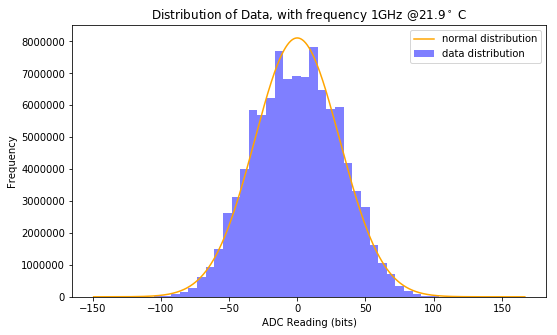

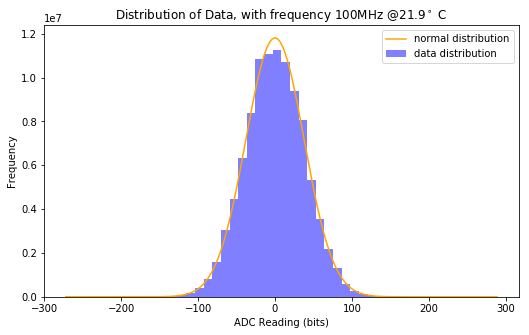

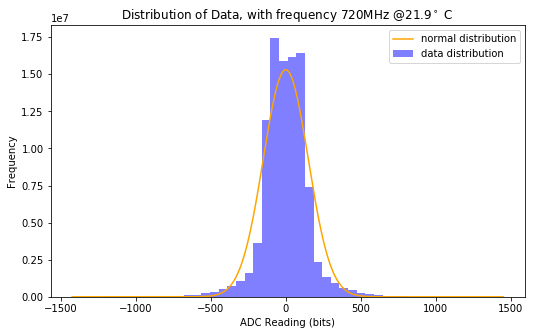

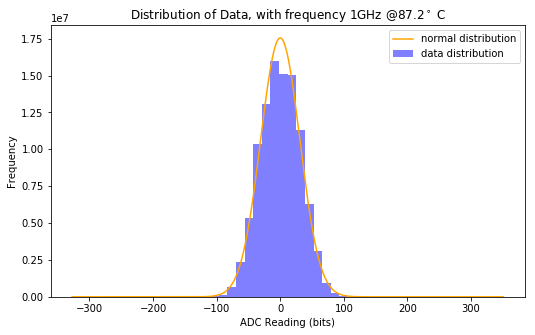

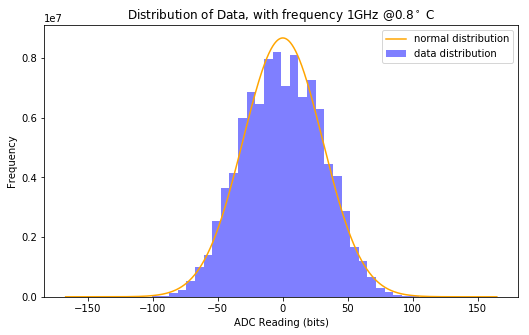

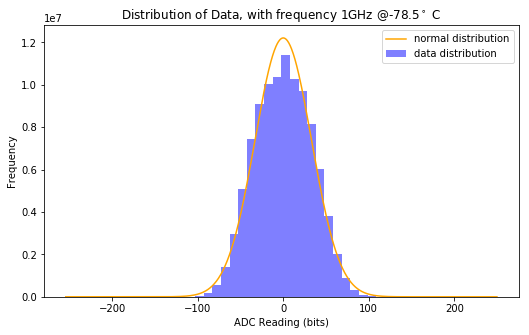

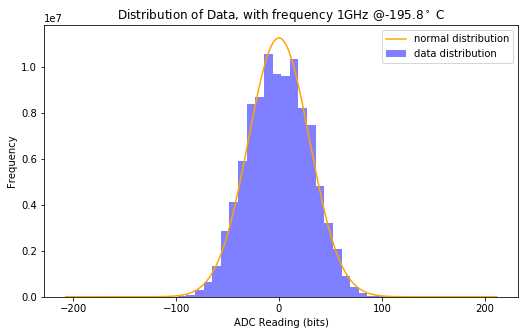

In [6]:
for i in range(len(filenames)): 
    plot_distribution(data[i], filenames[i], titles[i], hrange=(min(data[i]), max(data[i])))

In [8]:
power = np.empty(data.shape)
for entry in data:
    power[i] = constants.epsilon_0 * constants.c * entry**2 / 2

TypeError: '>=' not supported between instances of 'NoneType' and 'float'

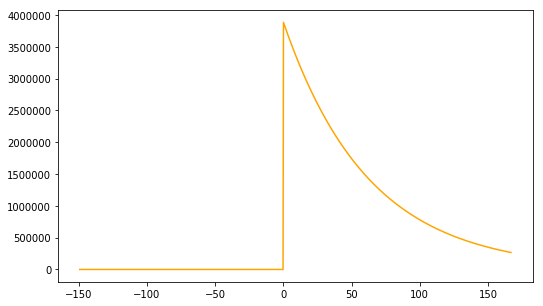

In [12]:
for i in range(len(filenames)):
    plot_chi2(data[i], 2, filenames[i], titles[i], hrange=(min(data[i]), max(data[i])))